# Read and plot ensemble mean data (province)
---
* This program is used for extracting and mapping ensemble mean data of the provincial average from the subdirectory:
data/data/Future/EnsembleMean/Province/

* [The original souce of the data](
http://lamps.math.yorku.ca/OntarioClimate/index_app_data.htm#/ProvinceAverageEnsembleMean)

* The data are annual values averaged over grids in Ontario, for 45 variables from 1981-2099

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# user can select one of the variables in the next cell
varNames = ['CDD','Cold_day','Cold_night','DTR','FD','GSL','HDD','Hot_day','Hot_night','HWDI_days','HWDI_period',
            'HWDI_strength','ID','GS_StartDay','GS_EndDay','pr95pDays','pr95pTOT','pr99pDays','pr99pTOT','prCDD','PRCPTOT',
            'prCWD','R1mm','R5mm','R10mm','R20mm','R25mm','RX1day','RX5day','SDII','SU','tnCSDI','TNn','TNx',
            'TR','TXn','TXx','txWSDI','Tm','Tx','Tn','Pr', 'CHU','FFS','GDD']
# user can select one of the RCPs 
rcpNames =['RCP26', 'RCP45', 'RCP60', 'RCP85']  
print(np.size(varNames))

45


  Row  Ref  RCP26_2050s  RCP45_2050s  RCP60_2050s  RCP85_2050s  RCP26_2080s  \
0  Tm  1.6          1.9          2.6          2.3          3.3          1.9   
1  Tx  6.7          1.8          2.4          2.1          3.1          1.8   

   RCP45_2080s  RCP60_2080s  RCP85_2080s  
0          3.3          3.9          5.7  
1          3.1          3.6          5.5  


Text(0, 0.5, 'Tm')

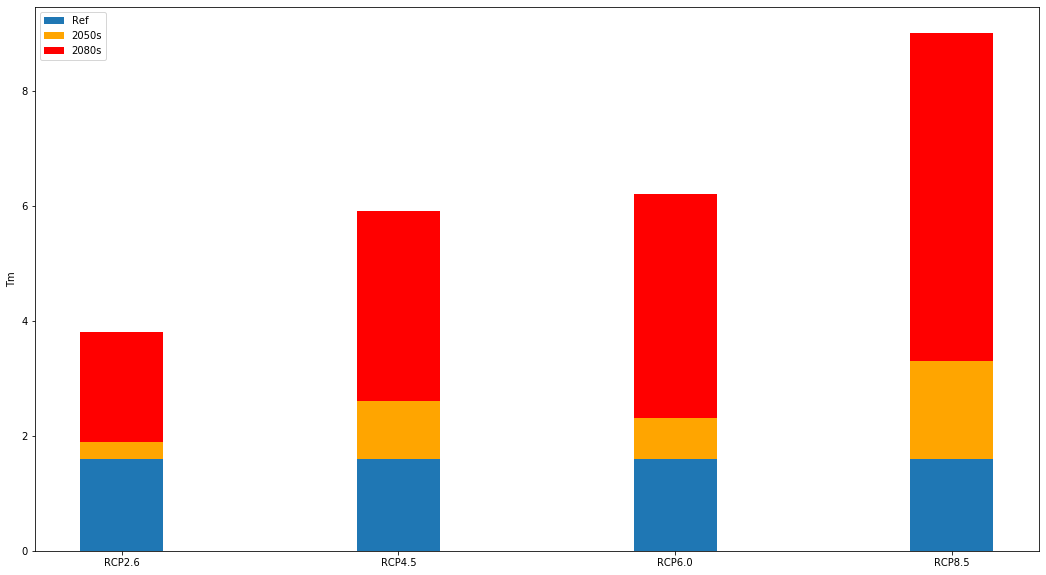

In [39]:
# read provincial summary data
summaryfile = '../data/data/Future/EnsembleMean/Province/ProvincialSummary.csv'
summary=pd.read_csv(summaryfile)
print(summary.head(2))
# the values are changes (RCP??_20?0s) relative to the reference (Ref) values
#  user just need to change the variable name and run this cell
varName = 'Tm'



var2Bar= np.array(summary.loc[summary['Row']==varName])[0,1:]
# print(var2Bar)
Ref = np.repeat(var2Bar[0], 4)
ch50 = var2Bar[1:5]
ch80 = var2Bar[5:9]
rcp=np.arange(4)
figure1 = plt.figure(figsize=(18,10))
bar1 = plt.bar(rcp,Ref, width=0.3)
bar2 = plt.bar(rcp,ch50,bottom=Ref,color ='orange', width=0.3),
bar3 = plt.bar(rcp,ch80,bottom=ch50, color='red', width=0.3)
plt.xticks(rcp,('RCP2.6','RCP4.5','RCP6.0','RCP8.5'))
plt.legend((bar1[0],bar2[0],bar3[0]),('Ref','2050s','2080s'))
plt.ylabel(varName)


Text(0.5, 1.0, 'HDD Changes Ref=6093.4')

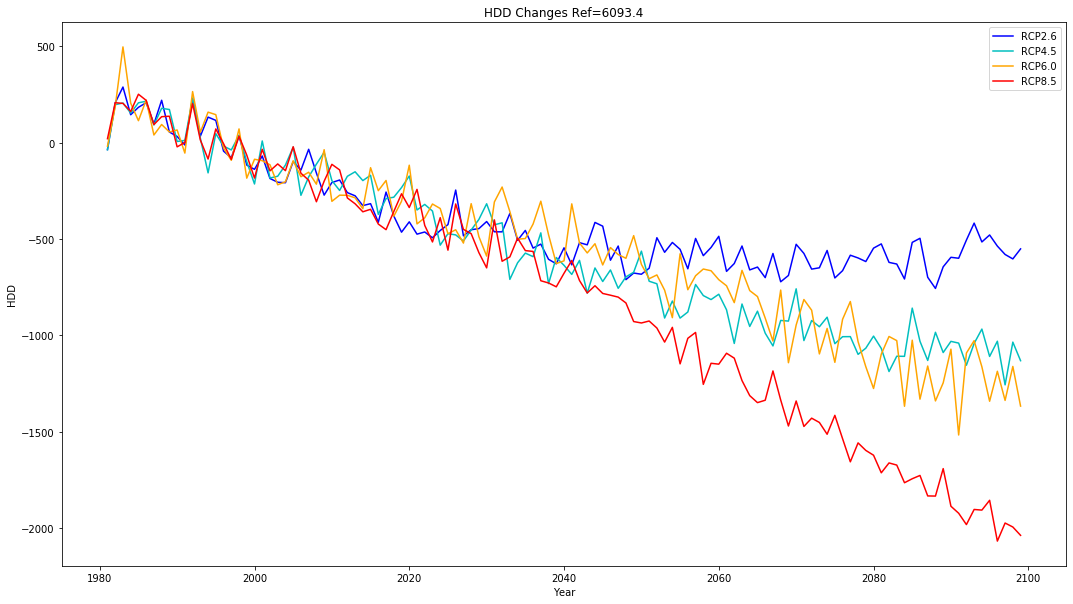

In [40]:
# user can change the variable name (select one from the varNames)
varName='HDD'
refvalue=np.array(summary.loc[summary['Row']==varName])[0,1]
# print(refvalue)
#  then file name is:
csvfile = '../data/data/Future/EnsembleMean/Province/' + varName + '_ProvinceAverageEnsembleMean.csv'
# data in this file is anomaly relative to the refrence values in summary
data0 = pd.read_csv(csvfile)
data=np.array(data0)
year=data[:,0]
rcp26=data[:,1]
rcp45=data[:,2]
rcp60=data[:,3]
rcp85=data[:,4]
figure2=plt.figure(figsize=(18,10))
l1=plt.plot(year,rcp26,color='blue')
l2=plt.plot(year,rcp45,color='c')
l3=plt.plot(year,rcp60,color='orange')
l4=plt.plot(year,rcp85,color='red')
plt.legend(('RCP2.6','RCP4.5','RCP6.0','RCP8.5'))
plt.xlabel('Year')
plt.ylabel(varName)
titletext=varName + ' Changes Ref=' + str(refvalue) 
plt.title(titletext)